# Superposition and Entanglement in Qiskit
This notebook demonstrates:
1. **Superposition** using a single qubit.
2. **Entanglement** using two qubits.
We will use Qiskit to create circuits, visualize the states, and measure outcomes.

In [9]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit
!pip install qiskit-aer




In [19]:
# ===========================
# Import Libraries
# ===========================
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt


## 1. Superposition Example

Statevector after H on |0>: [0.70710678+0.j 0.70710678+0.j]


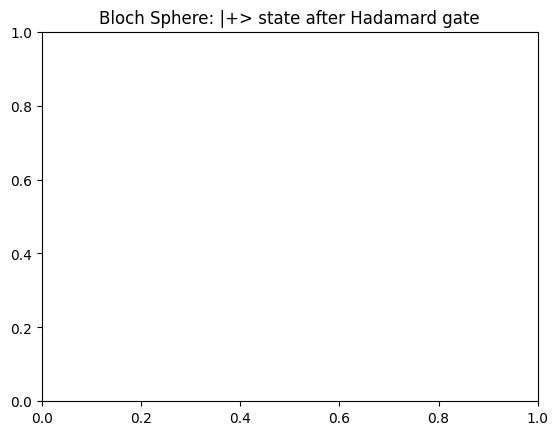

Measurement counts: {'0': 522, '1': 502}


In [15]:
qc_super = QuantumCircuit(1, 1)
qc_super.h(0)
qc_super.measure(0, 0)

# ✅ Create a copy of the circuit *before measurement* for the Bloch sphere
qc_super_no_measure = QuantumCircuit(1)
qc_super_no_measure.h(0)

# Get the statevector for visualization
sv = Statevector.from_instruction(qc_super_no_measure)
print("Statevector after H on |0>:", sv.data)

# Plot Bloch sphere
plot_bloch_multivector(sv)
plt.title("Bloch Sphere: |+> state after Hadamard gate")
plt.show()

# Simulate measurement results
sim = AerSimulator()
result = sim.run(qc_super, shots=1024).result()
counts_super = result.get_counts()
print("Measurement counts:", counts_super)

# Plot histogram
plot_histogram(counts_super, title="Superposition (Hadamard) Measurement Results")
plt.show()

## 2. Entanglement Example

In [20]:
# Create a 2-qubit circuit
qc_ent = QuantumCircuit(2, 2)
qc_ent.h(0)
qc_ent.cx(0, 1)
qc_ent.measure([0, 1], [0, 1])

# ✅ Create a copy without measurement for the statevector visualization
qc_ent_no_measure = QuantumCircuit(2)
qc_ent_no_measure.h(0)
qc_ent_no_measure.cx(0, 1)

# Compute the statevector of the Bell state (|00⟩ + |11⟩)/√2
sv_ent = Statevector.from_instruction(qc_ent_no_measure)
print("Statevector for Bell state (|00> + |11>)/√2:\n", sv_ent.data)

# Simulate measurements with AerSimulator
sim = AerSimulator()
tq_ent = transpile(qc_ent, sim)
result_ent = sim.run(tq_ent, shots=2048).result()
counts_ent = result_ent.get_counts()

# Print and plot results
print("Measurement counts:", counts_ent)
plot_histogram(counts_ent, title="Entanglement (Bell State) Results — correlated 00 and 11")
plt.show()

Statevector for Bell state (|00> + |11>)/√2:
 [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Measurement counts: {'00': 1023, '11': 1025}
